# 기울기 소실(Gradient Vanishing)과 폭주(Exploding)
- 역전파 과정에서 입력층으로 갈수록 기울기가 점차적으로 작아지는 현상: 기울기 소실
- 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 발산하는 현상: 기울기 폭주
- 순환 신경망(Recurrent Neural Network, RNN)에서 쉽게 발생할 수 있습니다.

## 1. ReLU와 ReLU의 변형들
- 은닉층에선 시그모이드 함수를 사용하면 안 됩니다.
- Leaky ReLU를 사용하면 모든 입력값에 대해서 기울기가 0에 수렴하지 않아 죽은 ReLU 문제를 해결합니다.
- 은닉층에선 ReLU나 Leaky ReLU와 같은 ReLU 함수의 변형들을 사용하세요.

## 2. 그래디언트 클리핑: Gradient Clipping
- 기울기 값을 자르는 것, 기울기 폭주를 막기 위해 임계값을 넘지 않도록 값을 자릅니다.
- 이는 RNN에서 유용합니다. RNN은 역전파 과정에서 시점을 역행하면서 기울기를 구하는데, 이때 기울기가 너무 커질 수 있기 때문입니다.

In [1]:
from tensorflow.keras import optimizers

Adam = optimizers.Adam(lr=0.0001, clipnorm=1.)

## 3. 가중치 초기화: Weight initialization

### 1. 세이비어 초기화: Xavier Initialization
- 논문: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
- 균등 분포(Uniform Distribution) 또는 정규 분포(Normal distribution)로 초기화 할 때 두 가지 경우로 나뉘며, 이전 층의 뉴런 개수와 다음 층의 뉴런 개수를 가지고 식을 세웁니다:
    - 균등 분포로 초기화:

        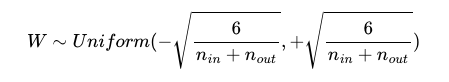
    - 정규 분포로 초기화: 평균 0, 표준 편차 뮤

        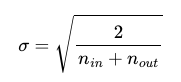
- 세이비어 초기화는 여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목 받거나 다른 층이 뒤쳐지는 것을 막습니다.
- 그리고 시그모이드나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함수와 함께 사용할 경우 좋은 성능을 보이지만, ReLU와 함께 사용할 경우 성능이 좋지 않습니다.

### 2. He 초기화: He initialization
- 논문: https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf
- He 초기화도 정규 분포와 균등 분포 두 가지 경우로 나뉩니다. 다만, 세이비어와 다르게 다음 층의 뉴런 수를 반영하지 않습니다.
    - 균등 분포로 초기화:

        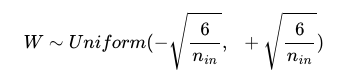
    - 정규 분포로 초기화:

        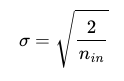
- ReLU 계열 함수를 사용할 경우엔 He 초기화 방법이 효율적입니다.

## 4. 배치 정규화: Batch Normalization
- 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만듭니다.

### 1. 내부 공변량 변화: Internal Covariate Shift
- 학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상
- 공변량 변화는 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우를 의미합니다.
- 내부 공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화를 의미합니다.

### 2. 배치 정규화: Batch Normalization
- 배치 단위로 정규화하는 것, 각 층에서 활성화 함수를 통과하기 전에 수행됩니다.
- 입력에 대해 평균을 0으로 만들고, 정규화합니다. 그리고 이 데이터에 대해서 스케일과 시프트를 수행합니다.

    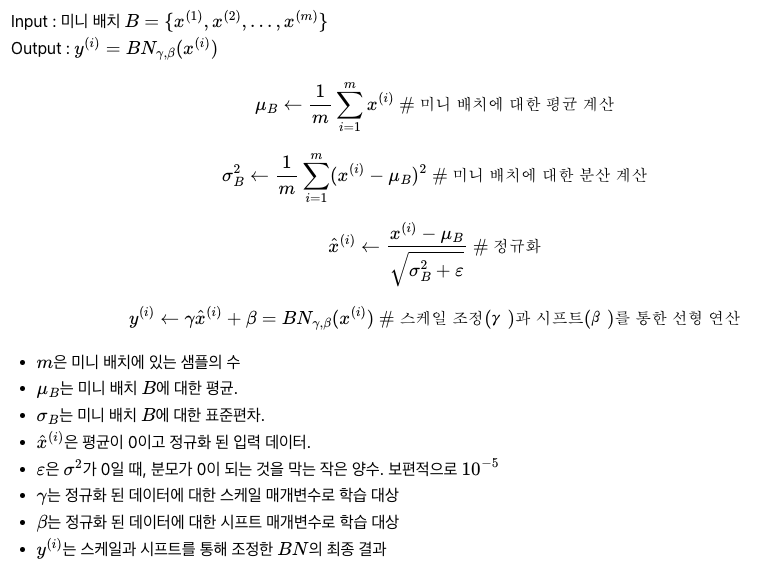
- 배치 정규화를 사용하면 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제가 크게 개선됩니다.
- 가중치 초기화에 훨씬 덜 민감해집니다.
- 훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선시킵니다.
- 배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간이 느려집니다. 

### 3. 배치 정규화의 한계
- 미니 배치 크기에 의존적이여서 너무 작은 배치 크기에선 잘 동작하지 않을 수 있습니다.
- RNN에 적용하기 어렵다.

## 5. 층 정규화: Layer Normalization
- m=3, layer=4의 배치 정규화:

    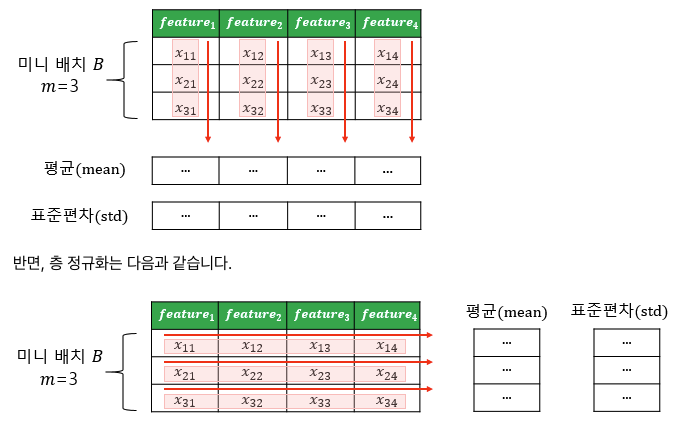